In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. Obtain Day-Aggregated Historical Data

In [2]:
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [3]:
# tickers = ['AAPL', 'ADBE', 'ORCL', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM', 'SPY']

import json

# 1. Open the file
with open("ticker_lists/ndx.json", "r", encoding="utf-8") as f:
    # 2. Parse the JSON
    tickers = json.load(f)      # <-- data is now a Python object
tickers.sort()

In [4]:
tickers

['AAPL',
 'ABNB',
 'ADBE',
 'ADI',
 'ADP',
 'ADSK',
 'AEP',
 'AMAT',
 'AMD',
 'AMGN',
 'AMZN',
 'ANSS',
 'APP',
 'ARM',
 'ASML',
 'AVGO',
 'AXON',
 'AZN',
 'BIIB',
 'BKNG',
 'BKR',
 'CCEP',
 'CDNS',
 'CDW',
 'CEG',
 'CHTR',
 'CMCSA',
 'COST',
 'CPRT',
 'CRWD',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTSH',
 'DASH',
 'DDOG',
 'DXCM',
 'EA',
 'EXC',
 'FANG',
 'FAST',
 'FTNT',
 'GEHC',
 'GFS',
 'GILD',
 'GOOG',
 'GOOGL',
 'HON',
 'IDXX',
 'INTC',
 'INTU',
 'ISRG',
 'KDP',
 'KHC',
 'KLAC',
 'LIN',
 'LRCX',
 'LULU',
 'MAR',
 'MCHP',
 'MDLZ',
 'MELI',
 'META',
 'MNST',
 'MRVL',
 'MSFT',
 'MSTR',
 'MU',
 'NFLX',
 'NVDA',
 'NXPI',
 'ODFL',
 'ON',
 'ORLY',
 'PANW',
 'PAYX',
 'PCAR',
 'PDD',
 'PEP',
 'PLTR',
 'PYPL',
 'QCOM',
 'REGN',
 'ROP',
 'ROST',
 'SBUX',
 'SHOP',
 'SNPS',
 'TEAM',
 'TMUS',
 'TSLA',
 'TTD',
 'TTWO',
 'TXN',
 'VRSK',
 'VRTX',
 'WBD',
 'WDAY',
 'XEL',
 'ZS']

In [5]:
start_date="2020-01-01"
end_date="2025-08-01"

In [6]:
import pandas as pd
import logging
from pandas.errors import EmptyDataError
from tqdm import tqdm

# silence OpenBB + yfinance chatter
for lg in ["openbb_core", "openbb_yfinance", "openbb", "yfinance"]:
    logging.getLogger(lg).setLevel(logging.CRITICAL)

frames, failed = [], []
pbar = tqdm(tickers, desc="Download") 
for tkr in pbar:
    pbar.set_description(tkr)
    try:
        df_new = obb.equity.price.historical(
            symbol=tkr,
            start_date=start_date,
            end_date=end_date,
            provider="yfinance",
        )
        df_new["ticker"] = tkr
        frames.append(df_new)
    except (EmptyDataError, Exception):
        failed.append(tkr)

# stitch together only the good results
if frames:           # avoid concat([]) when everything failed
    df = pd.concat(frames, ignore_index=False)

if failed:
    print("\nThese tickers had no data:", failed)

ZS: 100%|██████████| 101/101 [00:46<00:00,  2.15it/s]  


In [7]:
df

,open,high,low,close,volume,split_ratio,dividend,ticker
date,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,135480400,0.0,0.0,AAPL
2020-01-03,74.287498,75.144997,74.125000,74.357498,146322800,0.0,0.0,AAPL
2020-01-06,73.447502,74.989998,73.187500,74.949997,118387200,0.0,0.0,AAPL
2020-01-07,74.959999,75.224998,74.370003,74.597504,108872000,0.0,0.0,AAPL
2020-01-08,74.290001,76.110001,74.290001,75.797501,132079200,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...
2025-07-28,288.109985,290.000000,285.649994,289.040009,1166600,NaN,NaN,ZS
2025-07-29,290.839996,293.634003,286.549988,290.070007,1963100,NaN,NaN,ZS
2025-07-30,290.760010,290.859985,283.399994,287.730011,1056900,NaN,NaN,ZS


In [8]:
for ticker in tickers:
    if df[df['ticker']==ticker].index.min()!=df.index.unique().min() or df[df['ticker']==ticker].index.max()!=df.index.unique().max():
        df = df[df['ticker']!=ticker]

In [9]:
len(df['ticker'].unique())

92

In [10]:
df

,open,high,low,close,volume,split_ratio,dividend,ticker
date,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,135480400,0.0,0.0,AAPL
2020-01-03,74.287498,75.144997,74.125000,74.357498,146322800,0.0,0.0,AAPL
2020-01-06,73.447502,74.989998,73.187500,74.949997,118387200,0.0,0.0,AAPL
2020-01-07,74.959999,75.224998,74.370003,74.597504,108872000,0.0,0.0,AAPL
2020-01-08,74.290001,76.110001,74.290001,75.797501,132079200,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...
2025-07-28,288.109985,290.000000,285.649994,289.040009,1166600,NaN,NaN,ZS
2025-07-29,290.839996,293.634003,286.549988,290.070007,1963100,NaN,NaN,ZS
2025-07-30,290.760010,290.859985,283.399994,287.730011,1056900,NaN,NaN,ZS


## 2. Find Cointegrated Pairs

In [11]:
from itertools import combinations
import os, numpy as np, pandas as pd
from statsmodels.tsa.stattools import coint
from joblib import Parallel, delayed
from tqdm import tqdm
import joblib
from contextlib import contextmanager

# ---------- progress helper for joblib + tqdm ----------
@contextmanager
def tqdm_joblib(tqdm_object):
    """Context manager to patch joblib to report into tqdm progress bar."""
    class TqdmBatchCallback(joblib.parallel.BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=self.batch_size)
            return super().__call__(*args, **kwargs)

    old_cb = joblib.parallel.BatchCompletionCallBack
    joblib.parallel.BatchCompletionCallBack = TqdmBatchCallback
    try:
        yield tqdm_object
    finally:
        joblib.parallel.BatchCompletionCallBack = old_cb
        tqdm_object.close()

# ------------- helpers ------------- #
def _test_pair(idx_pair, keys, data, full_start, full_end, alpha):
    i, j   = idx_pair
    k1, k2 = keys[i], keys[j]
    S1 = data.loc[data["ticker"] == k1, "close"]
    S2 = data.loc[data["ticker"] == k2, "close"]

    if (S1.index[0] == full_start and S1.index[-1] == full_end and
        S2.index[0] == full_start and S2.index[-1] == full_end):
        score, pval, _ = coint(S1, S2)
        if pval < alpha:
            return i, j, score, pval
    return i, j, 0.0, None

# ------------- main API ------------ #
def find_cointegrated_pairs_joblib(
    data: pd.DataFrame,
    *,
    alpha: float = 0.05,
    n_workers: int | None = None,
    chunksize: int = 250,          # maps to joblib's batch_size
    show_progress: bool = True,
):
    # Keep BLAS libs from oversubscribing threads; children inherit env
    os.environ.setdefault("OPENBLAS_NUM_THREADS", "1")
    os.environ.setdefault("MKL_NUM_THREADS",      "1")
    os.environ.setdefault("NUMEXPR_NUM_THREADS",  "1")

    keys = np.asarray(data["ticker"].unique())
    n    = len(keys)
    score_matrix  = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    pairs         = []

    full_start, full_end = data.index.min(), data.index.max()
    combos     = list(combinations(range(n), 2))
    n_workers  = n_workers or os.cpu_count()

    task_kwargs = dict(
        keys=keys, data=data,
        full_start=full_start, full_end=full_end, alpha=alpha
    )

    iterator = (delayed(_test_pair)(idx_pair, **task_kwargs) for idx_pair in combos)

    if show_progress:
        with tqdm_joblib(tqdm(total=len(combos), desc="Cointegration tests", leave=False)):
            results = Parallel(n_jobs=n_workers, prefer="processes", batch_size=chunksize)(iterator)
    else:
        results = Parallel(n_jobs=n_workers, prefer="processes", batch_size=chunksize)(iterator)

    for i, j, score, pval in results:
        k1, k2 = keys[i], keys[j]
        score_matrix[i, j] = score
        if pval is not None:
            pvalue_matrix[i, j] = pval
            pairs.append((k1, k2))

    return score_matrix, pvalue_matrix, pairs


In [20]:
# Heatmap to show the p-values of the cointegration test between each pair of
# stocks. Only show the value in the upper-diagonal of the heatmap
scores, pvalues, pairs = find_cointegrated_pairs_joblib(df, n_workers=22, show_progress=True)

In [13]:
from pprint import pprint
pprint(pairs)

[('AAPL', 'ADI'),
 ('AAPL', 'BKR'),
 ('AAPL', 'LIN'),
 ('AAPL', 'MAR'),
 ('ADI', 'ADP'),
 ('ADI', 'AZN'),
 ('ADI', 'BKR'),
 ('ADI', 'CCEP'),
 ('ADI', 'CDNS'),
 ('ADI', 'COST'),
 ('ADI', 'CPRT'),
 ('ADI', 'CTAS'),
 ('ADI', 'GOOG'),
 ('ADI', 'GOOGL'),
 ('ADI', 'INTU'),
 ('ADI', 'KLAC'),
 ('ADI', 'LIN'),
 ('ADI', 'MAR'),
 ('ADI', 'MSFT'),
 ('ADI', 'ORLY'),
 ('ADI', 'PANW'),
 ('ADI', 'ROP'),
 ('ADI', 'SNPS'),
 ('ADP', 'BKR'),
 ('ADP', 'FTNT'),
 ('ADP', 'INTC'),
 ('ADSK', 'AMZN'),
 ('ADSK', 'EA'),
 ('ADSK', 'SHOP'),
 ('ADSK', 'TTWO'),
 ('AEP', 'AVGO'),
 ('AEP', 'AXON'),
 ('AEP', 'BIIB'),
 ('AEP', 'BKNG'),
 ('AEP', 'CMCSA'),
 ('AEP', 'COST'),
 ('AEP', 'CRWD'),
 ('AEP', 'FTNT'),
 ('AEP', 'INTC'),
 ('AEP', 'LULU'),
 ('AEP', 'MSTR'),
 ('AEP', 'NVDA'),
 ('AEP', 'TMUS'),
 ('AMAT', 'NXPI'),
 ('AMAT', 'ROST'),
 ('AMD', 'INTU'),
 ('AMD', 'MU'),
 ('AMGN', 'AVGO'),
 ('AMGN', 'BIIB'),
 ('AMGN', 'BKNG'),
 ('AMGN', 'CDNS'),
 ('AMGN', 'CHTR'),
 ('AMGN', 'COST'),
 ('AMGN', 'CPRT'),
 ('AMGN', 'CTAS'),
 ('AM

## 3. Visualize Cointegrated Pairs

### 3.1 Heat Map of Cointegrated Pairs

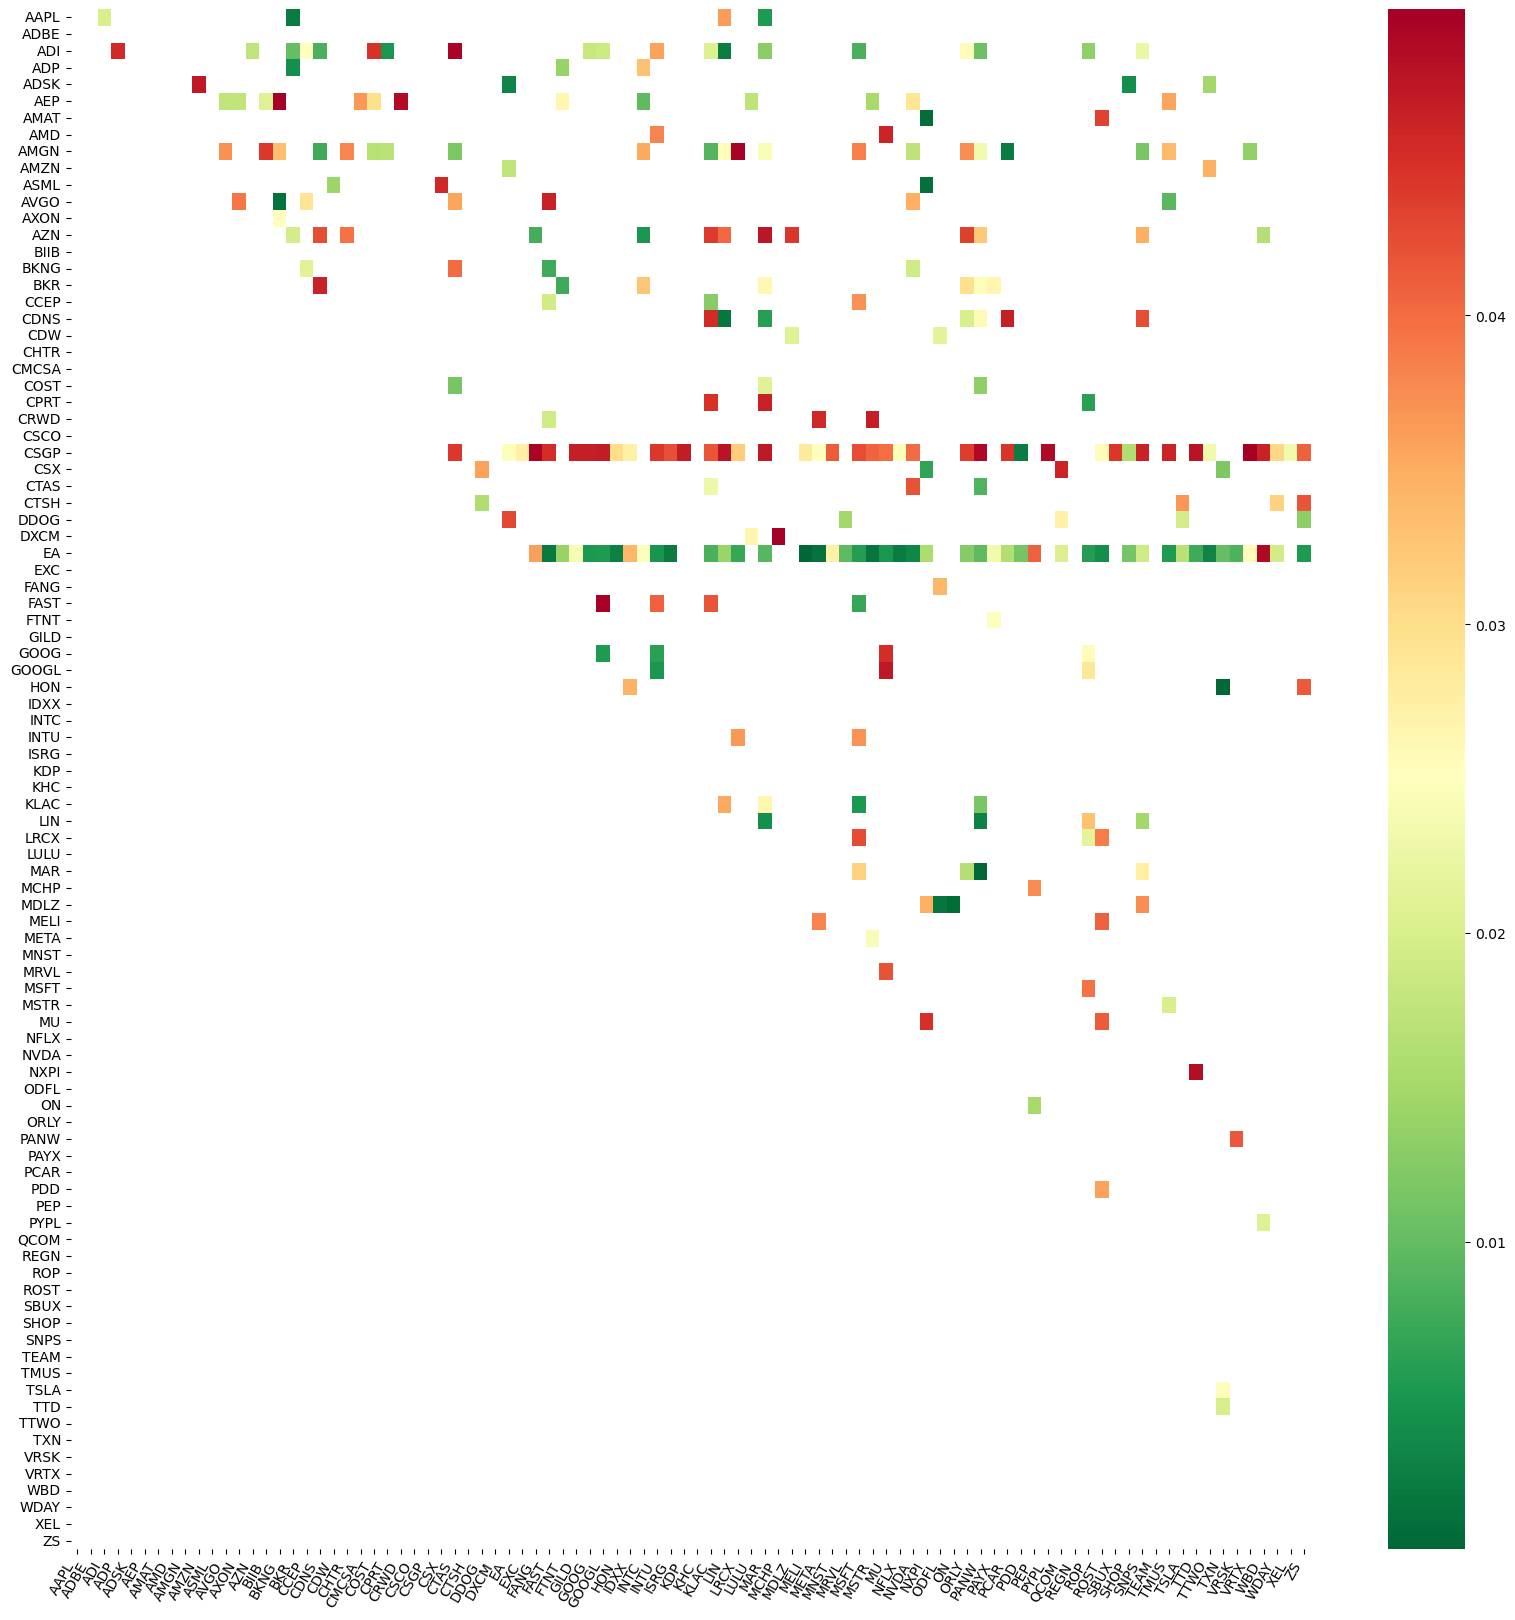

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))

alpha = 0.05
mask = (pvalues>=alpha)

sns.heatmap(pvalues, 
            xticklabels=list(df['ticker'].unique()), 
            yticklabels=list(df['ticker'].unique()),
            cmap='RdYlGn_r', 
            mask=mask)
_ = plt.setp(ax.get_xticklabels(), rotation=60, ha='right')


### 3.2 Network View 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def plot_cointegration_network(
    pvalues,
    tickers=None,
    *,
    alpha=0.05,
    sort_labels=True,
    symmetrize=True,            # use min(p_ij, p_ji) to fill both triangles
    min_strength_log10=None,    # e.g. 2 -> keep only -log10(p) > 2 (p < 0.01)
    seed=42,
    return_graph=False
):
    """
    Plot a cointegration network from a p-value matrix, showing only nodes that
    participate in at least one significant edge. The full graph (with isolates)
    is still built and can be returned.

    Parameters
    ----------
    pvalues : (n, n) array-like
        P-value matrix (upper-tri only or symmetric). Diagonal is ignored.
    tickers : list[str], optional
        Labels for nodes. If omitted, uses N0..N{n-1}.
    alpha : float
        Significance threshold; edges kept where p < alpha.
    sort_labels : bool
        Alphabetically sort tickers (rows/cols are reordered accordingly).
    symmetrize : bool
        If True, use min(p_ij, p_ji) to make the matrix symmetric before filtering.
        If False, only the upper triangle is considered.
    min_strength_log10 : float or None
        Additional filter on edge strength: keep only if -log10(p) > this value.
    seed : int
        Seed for layout.
    return_graph : bool
        If True, return (G, G_plot) where G is full graph and G_plot excludes isolates.
    """

    P = np.asarray(pvalues, dtype=float)
    n = P.shape[0]
    labels = list(tickers) if (tickers is not None and len(tickers) == n) else [f"N{i}" for i in range(n)]

    # Optional alphabetical sort
    if sort_labels:
        order = np.argsort(labels)
        labels = [labels[i] for i in order]
        P = P[np.ix_(order, order)]

    # Symmetrize (recommended when you only filled i<j)
    if symmetrize:
        # Treat NaN as +inf so the min ignores missing side
        P_sym = np.minimum(np.nan_to_num(P, nan=np.inf), np.nan_to_num(P.T, nan=np.inf))
        np.fill_diagonal(P_sym, np.inf)  # ignore self-edges
        P_used = P_sym
        tri_mask = np.tril(np.ones_like(P_used, dtype=bool), k=-1)  # take lower tri to avoid dupes
    else:
        # Assume upper triangle holds the data
        P_used = P.copy()
        np.fill_diagonal(P_used, np.inf)
        tri_mask = np.triu(np.ones_like(P_used, dtype=bool), k=1)

    # Edge selection
    keep = tri_mask & np.isfinite(P_used) & (P_used < alpha)

    # Optional additional strength filter
    if min_strength_log10 is not None:
        strength = -np.log10(np.clip(P_used, 1e-300, 1.0))
        keep &= (strength > float(min_strength_log10))

    # Build full graph (with all nodes), then add only significant edges
    G = nx.Graph()
    G.add_nodes_from(labels)

    ii, jj = np.where(keep)
    if ii.size:
        S = -np.log10(np.clip(P_used, 1e-300, 1.0))
        for i, j in zip(ii, jj):
            G.add_edge(labels[i], labels[j], weight=float(S[i, j]))

    # Subgraph with no isolates for plotting
    nodes_with_edges = [n for n, deg in G.degree() if deg > 0]
    G_plot = G.subgraph(nodes_with_edges).copy()

    # Draw
    fig, ax = plt.subplots(figsize=(12, 9))
    if G_plot.number_of_edges() == 0:
        ax.text(0.5, 0.5, f"No significant pairs (p < {alpha})",
                ha="center", va="center", fontsize=12)
        ax.set_axis_off()
        plt.tight_layout(); plt.show()
        return (G, G_plot) if return_graph else None

    pos = nx.spring_layout(G_plot, k=0.25, seed=seed)

    # Edge styling by strength
    w = np.array([d["weight"] for *_, d in G_plot.edges(data=True)])
    w_norm = (w - w.min()) / (w.ptp() + 1e-9)

    # Optional: size nodes by degree for readability
    deg = np.array([deg for _, deg in G_plot.degree()])
    node_sizes = 120 + 30 * deg  # tweak if needed

    nx.draw_networkx_nodes(G_plot, pos, node_size=node_sizes, ax=ax)
    nx.draw_networkx_labels(G_plot, pos, font_size=8, ax=ax)
    nx.draw_networkx_edges(G_plot, pos, width=1 + 4*w_norm, alpha=0.3 + 0.5*w_norm, ax=ax)

    ax.set_axis_off()
    ax.set_title(f"Significant cointegration network (p < {alpha})")
    plt.tight_layout(); plt.show()

    if return_graph:
        return G, G_plot

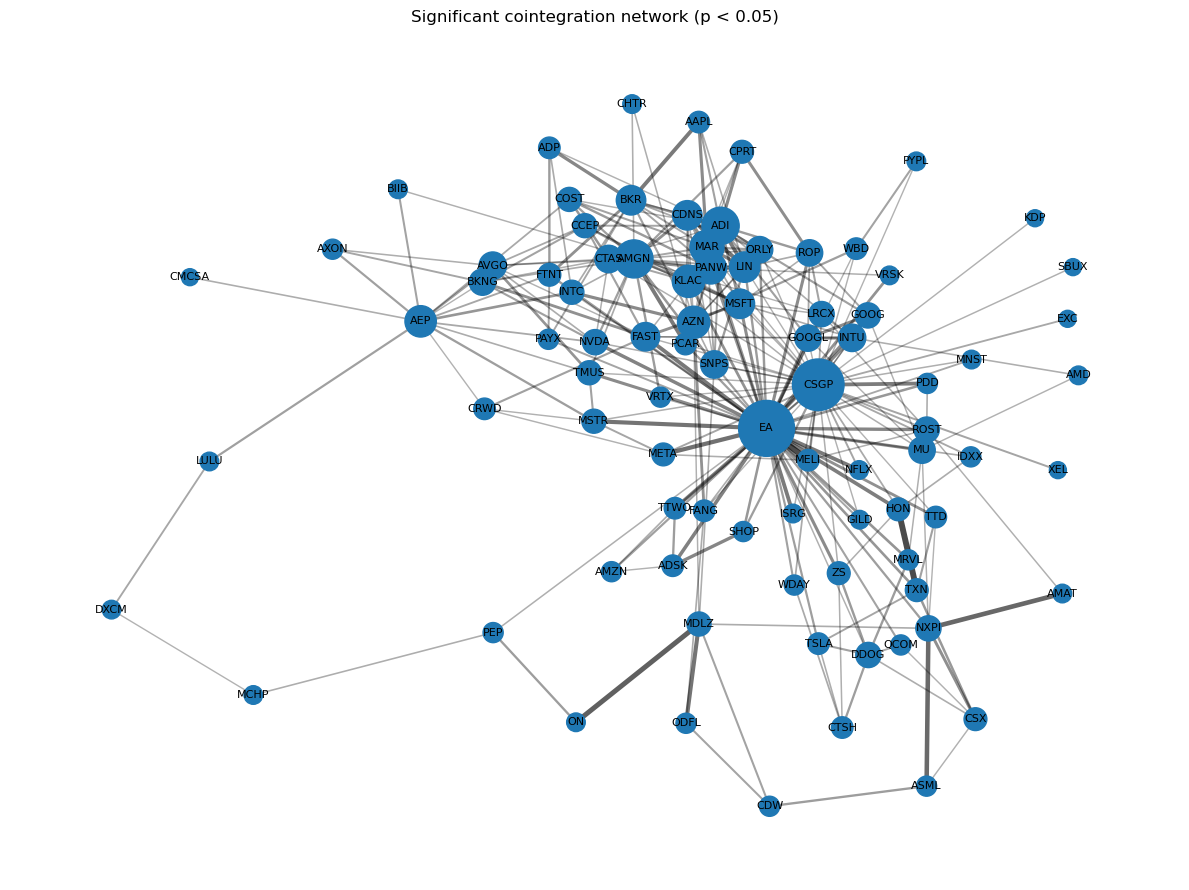

In [23]:
# tickers = list(df['ticker'].unique())
plot_cointegration_network(
    pvalues,
    tickers=tickers,
    alpha=0.05,
    sort_labels=True,
    symmetrize=True,          # recommended if you only filled i<j
    min_strength_log10=None,  # e.g. 2 for p < 0.01
    seed=42,
    return_graph=False
)


In the above plot, ASML is represented by the node at the bottom right and we can see that it is connected to other nodes via several edges. We can list the nodes or tickers with which ASML forms cointegrated pairs.

In [27]:
node = 'ASML'
for pair in pairs:
    if node==pair[0]:
        print(pair)
    if node==pair[1]:
        print(pair)

('ASML', 'CDW')
('ASML', 'CSX')
('ASML', 'NXPI')


### 3.3 Clustered Matrix

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list

def plot_cointegration_clustered_matrix(
    pvalues,
    tickers=None,
    *,
    alpha=0.05,
    sort_labels=True,
    symmetrize=True,            # use min(p_ij, p_ji)
    min_strength_log10=None,    # e.g. 2 => keep only -log10(p) > 2
    triangle="upper",           # "upper" | "lower" | "both"
    metric="euclidean",
    method="average",
    figsize=(14, 14),
    label_step=1
):
    P = np.asarray(pvalues, dtype=float)
    n = P.shape[0]
    labels = list(tickers) if (tickers is not None and len(tickers) == n) else [f"N{i}" for i in range(n)]

    # Optional alphabetical sort (kept consistent with the network plot)
    if sort_labels:
        order0 = np.argsort(labels)
        labels = [labels[i] for i in order0]
        P = P[np.ix_(order0, order0)]

    # Symmetrize by the smaller p (handles upper-tri-only matrices)
    if symmetrize:
        P_used = np.minimum(np.nan_to_num(P, nan=np.inf), np.nan_to_num(P.T, nan=np.inf))
    else:
        P_used = P.copy()
    np.fill_diagonal(P_used, np.inf)

    # Strength and significance
    S = -np.log10(np.clip(P_used, 1e-300, 1.0))     # higher = stronger
    keep = np.isfinite(P_used) & (P_used < alpha)
    if min_strength_log10 is not None:
        keep &= (S > float(min_strength_log10))

    # ---- CLUSTER FIRST (on symmetric profiles) ----
    X_for_cluster = np.nan_to_num(S * keep, nan=0.0)  # treat non-sig as 0
    Z = linkage(X_for_cluster, method=method, metric=metric)
    order = leaves_list(Z)
    labels_ord = [labels[i] for i in order]
    S_ord = S[np.ix_(order, order)]
    keep_ord = keep[np.ix_(order, order)]

    # ---- NOW apply the triangle mask in the reordered coordinates ----
    if triangle == "upper":
        tri_mask = np.tril(np.ones_like(S_ord, bool), k=0)  # hide diag+lower
    elif triangle == "lower":
        tri_mask = np.triu(np.ones_like(S_ord, bool), k=0)  # hide diag+upper
    else:  # "both"
        tri_mask = np.eye(n, dtype=bool)                    # hide diagonal only

    # Data to plot (NaN => blank cell)
    X_plot = np.where(~tri_mask & keep_ord, S_ord, np.nan)

    # ---- Plot ----
    fig, ax = plt.subplots(figsize=figsize)
    vmin = np.nanmin(X_plot); vmax = np.nanmax(X_plot)
    if not np.isfinite(vmin): vmin = 0.0
    if not np.isfinite(vmax): vmax = max(1.0, vmin + 1.0)

    sns.heatmap(
        X_plot,
        ax=ax,
        cmap="rocket",
        vmin=vmin, vmax=vmax,
        square=True,
        cbar_kws={"label": r"$-\log_{10}(p)$"},
        xticklabels=True, yticklabels=True
    )

    n2 = X_plot.shape[0]
    ax.set_xticks(np.arange(n2) + 0.5)
    ax.set_yticks(np.arange(n2) + 0.5)
    ax.set_xticklabels([lab if (i % label_step) == 0 else "" for i, lab in enumerate(labels_ord)],
                       rotation=60, ha="right", fontsize=8)
    ax.set_yticklabels([lab if (i % label_step) == 0 else "" for i, lab in enumerate(labels_ord)],
                       fontsize=8)

    for s in ax.spines.values(): s.set_visible(False)

    tname = {"upper": "upper", "lower": "lower", "both": "full"}[triangle]
    title = f"Clustered cointegration map ({tname} triangle, p < {alpha}"
    if min_strength_log10 is not None:
        title += f", -log10(p) > {min_strength_log10}"
    title += ")"
    ax.set_title(title)

    plt.tight_layout(); plt.show()



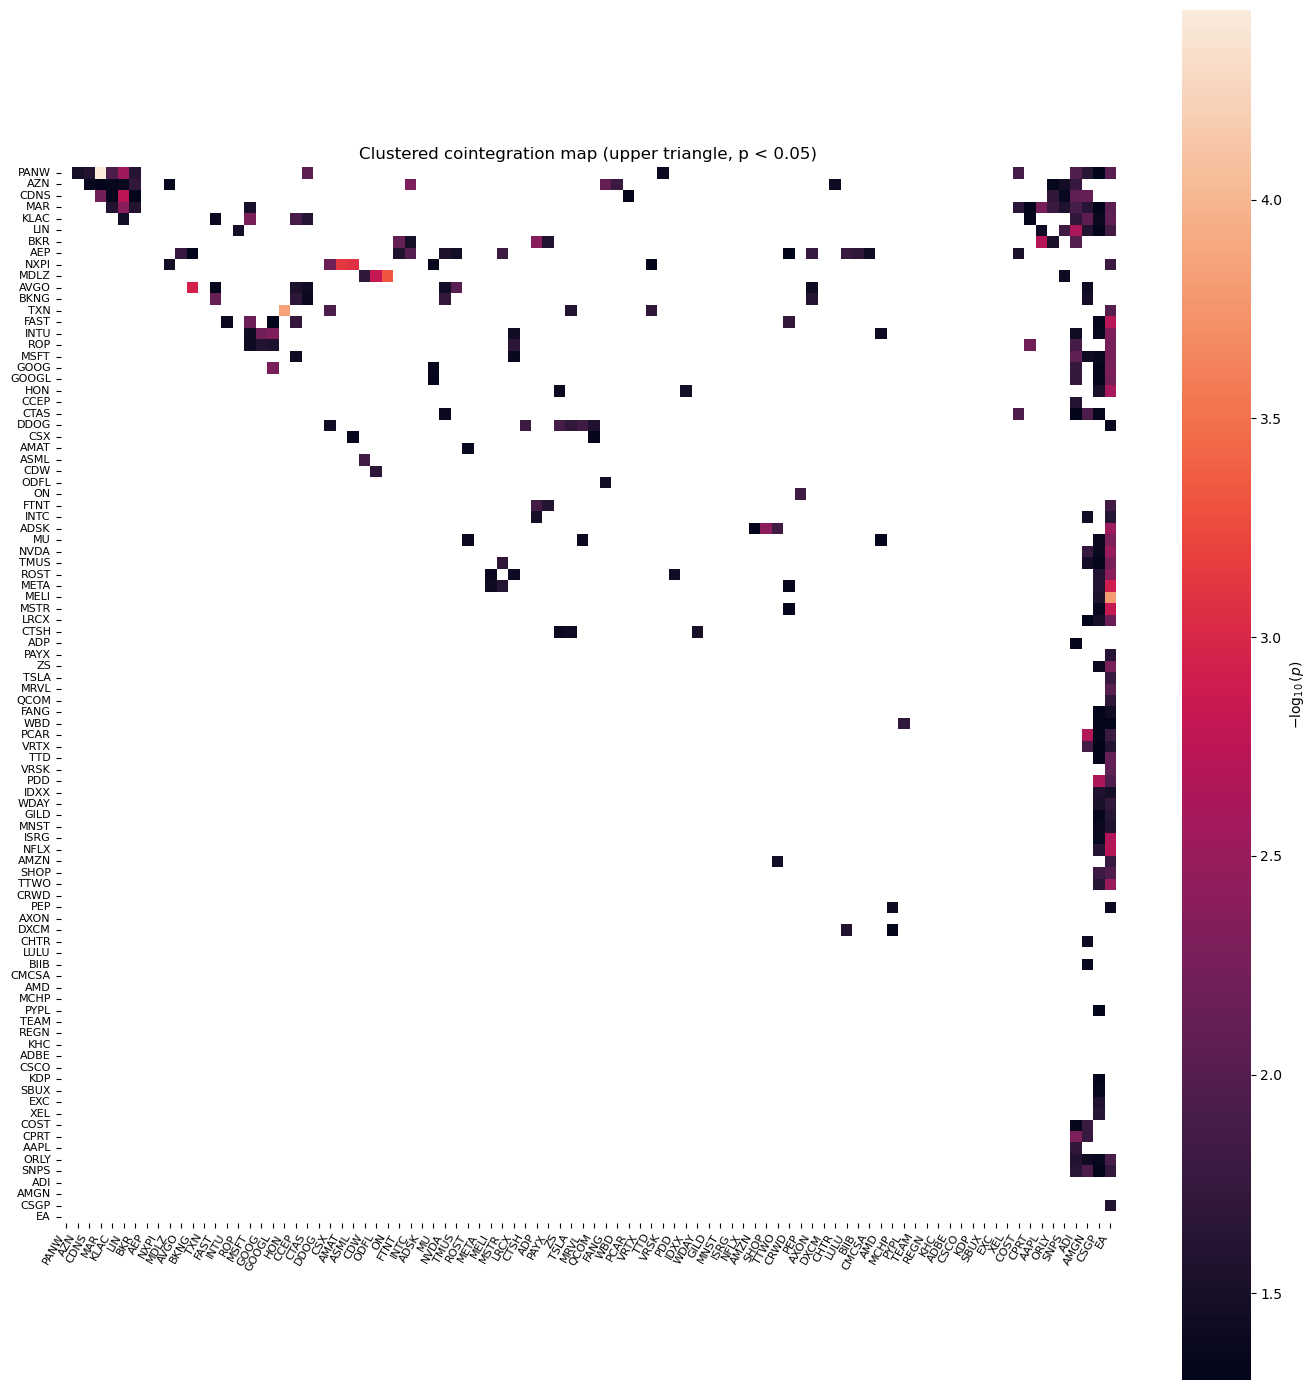

In [29]:
# tickers = list(df['ticker'].unique())
tickers = list(df['ticker'].unique())  # must be same order as pvalues rows/cols
plot_cointegration_clustered_matrix(
    pvalues,
    tickers=tickers,
    alpha=0.05,
    sort_labels=True,
    symmetrize=True,          # recommended if you only filled i<j
    min_strength_log10=None,  # e.g. 2 for p < 0.01
    triangle="upper",         # or "lower"/"both"
    metric="euclidean",
    method="average",
    figsize=(14, 14),
    label_step=1
)


#### Here’s how a clustered matrix differs from a heatmap:

1. **Row/column order**
    - Heatmap: fixed order (whatever order df['ticker'].unique() produced).
    - Clustered matrix: reorders tickers by *hierarchical clustering* of their cointegration profiles, so related names group into visible blocks.

2. **Triangle & masking**
    - Heatmap: you showed the upper triangle and masked $p\geq 0.05$.
    - Clustered matrix: still shows the upper triangle and masks $p\geq\alpha$, but the triangle mask is applied after reordering, so the plot stays triangular even post-cluster.
    - Both hide the diagonal.

3. **Symmetrization (robustness)**
    - Heatmap: plotted whatever was in pvalues (often only $i<j$ filled).
    - Clustered matrix: can symmetrize by the smaller p across $(i,j)/(j,i)$ before clustering/plotting, so you don’t lose information if only one triangle was populated.

4. **Color meaning & dynamic range**
    - Heatmap: colored by raw p-values (greens = smaller p in your palette).
    - Clustered matrix: colors by $−\log_{10}(p)$, which spreads tiny p-values and makes strong relationships pop without saturating.

5. **“Blank” vs “high p” cells**
    - Heatmap: masked cells were white and could be conflated with very high p.
    - Clustered matrix: uses NaN masking to leave truly absent/non-significant cells blank; the colorbar reflects only meaningful values ($−\log_{10}(p)$ for significant cells).

6. **Label handling**
    - Heatmap: alphabetical sort optional; labels matched the input order.
    - Clustered matrix: you can (a) alphabetize, then (b) cluster; labels are updated to match the reordered matrix so the heatmap is consistent and readable.

7. **Aesthetics**
    - Clustered matrix uses a modern, perceptually uniform colormap (rocket by default), square cells, slimmed axes, and an informative colorbar label ($−\log_{10}(p)$).

Net effect: the clustered matrix is the same statistical information, but (i) more robust to how pvalues was filled, (ii) ordered to reveal structure (sector/peer blocks), and (iii) visually scaled so strong pairs stand out.